In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/mnt/kauffman/nbserver/jupyter-run-software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/mnt/kauffman/nbserver/jupyter-run-software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Figure 1b, 1c, 1d, 1g and ExtDataFig 3f.

In [2]:
ML_concat = pd.read_pickle('data/SS3_cast_UMIs_concat_ML.pkl')

In [3]:
ML_concat = ML_concat[ML_concat[1]][0]

In [4]:
cast_bs_UMI = pd.Series([gene[2]/gene[1] for gene in ML_concat], index=ML_concat.index)

In [5]:
cast_bf_UMI = pd.Series([gene[0] for gene in ML_concat], index=ML_concat.index)

In [6]:
cast_me_UMI = pd.Series([gene[2]*(gene[0]/(gene[0]+gene[1])) for gene in ML_concat], index=ML_concat.index)

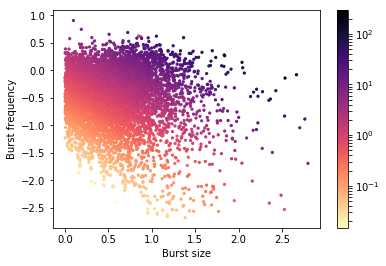

In [12]:
import matplotlib.colors as colors
plt.scatter(np.log10(cast_bs_UMI), np.log10(cast_bf_UMI), s=5, c=cast_me_UMI, cmap='magma_r', norm=colors.LogNorm(vmin=min(cast_me_UMI), vmax=max(cast_me_UMI)))
plt.colorbar()
plt.xlabel('Burst size')
plt.ylabel('Burst frequency')
plt.savefig('figures/ExtDataFig3f.pdf')
plt.show()

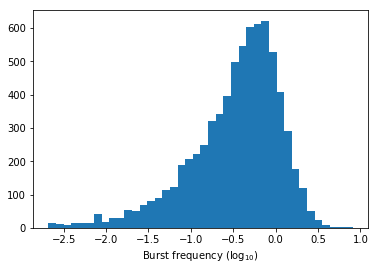

In [13]:
plt.hist(np.log10(cast_bf_UMI), bins=40)
plt.xlabel(r'Burst frequency (log$_{10}$)')
plt.savefig('figures/Fig1c.pdf')
plt.show()

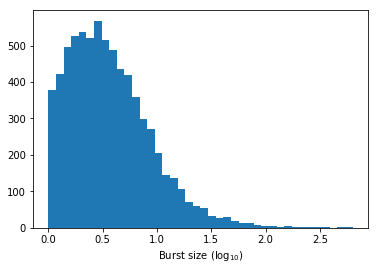

In [14]:
plt.hist(np.log10(cast_bs_UMI), bins=40)
plt.xlabel(r'Burst size (log$_{10}$)')
plt.savefig('figures/Fig1d.pdf')
plt.show()

In [15]:
cast_koff_UMI = pd.Series([gene[1] for gene in ML_concat], index=ML_concat.index)

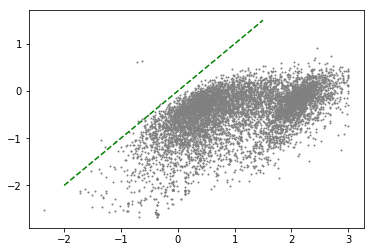

In [16]:
plt.plot(np.arange(-2,2,0.5),np.arange(-2,2,0.5), 'g--')
plt.scatter(np.log10(cast_koff_UMI), np.log10(cast_bf_UMI), s=1, c='grey')
plt.savefig('figures/Fig1g.pdf')
plt.show()